In [ ]:
pip install -U pm4py

     |████████████████████████████████| 1.4MB 6.5MB/s 
     |████████████████████████████████| 40.6MB 82kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23557 sha256=ffa1e9ba474fbb7f26c88b4bfe44fe300ebb5a4662aeaed499d0640d4ffe7599
  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built stringdist


In [ ]:
# https://towardsdatascience.com/introduction-to-process-mining-5f4ce985b7e5

import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")


# Example

In [ ]:
# csv
df = pd.read_csv('running-example.csv')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

log = log_converter.apply(df)

## Alpha Miner

In [ ]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

In [ ]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  


## Directly-Follows Graph

In [ ]:
# creating the graph from log
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
pn_visualizer.save(gviz, "dfg_petri_net.png")

## Heuristic Miner

In [ ]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
pn_visualizer.save(gviz, "heuristic.png")

In [ ]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.save(gviz, "heuristic_petri_net.png")

## Inductive Miner

In [ ]:
# create the process tree
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)
pn_visualizer.save(gviz, "inductive.png")

In [ ]:
# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.save(gviz, "inductive_petri_net.png")

# ILDE eventlog

In [ ]:
# importing CSVs
mooc1 = pd.read_csv('mooc1_v3.csv')
mooc1 = dataframe_utils.convert_timestamp_columns_in_df(mooc1)
mooc1 = mooc1.sort_values('timestamp')
mooc1 = mooc1.rename(columns={'performed_by_guid': 'case:concept:name', 'owner_guid': 'case:owner_guid', 'event': 'concept:name', 'timestamp': 'time:timestamp'})

mooc2 = pd.read_csv('mooc2_v3.csv')
mooc2 = dataframe_utils.convert_timestamp_columns_in_df(mooc2)
mooc2 = mooc2.sort_values('timestamp')
mooc2 = mooc2.rename(columns={'performed_by_guid': 'case:concept:name', 'owner_guid': 'case:owner_guid', 'event': 'concept:name', 'timestamp': 'time:timestamp'})

log1 = log_converter.apply(mooc1)
log2 = log_converter.apply(mooc2)

In [ ]:
# basic counts
count1 = mooc1["concept:name"].value_counts(normalize=False)
count2 = mooc2["concept:name"].value_counts(normalize=False)

print("mooc1:\n", count1, "\n\nmooc2:\n", count2)

mooc1:
 viewed_lds               33394
revised_docs              5029
publish                   4016
login                     3454
create from duplicate     1131
create                     750
generic_comment            582
delete                     429
share_add_viewer            27
share_add_acv                5
viewed_profile               3
share_del_viewer             2
share_add_editor             1
Name: concept:name, dtype: int64 

mooc2:
 viewed_lds               30959
revised_docs              3559
publish                   3415
login                     3353
create                    2664
share_add_viewer          1906
generic_comment            861
delete                     585
create from duplicate      189
share_del_viewer            69
share_add_editor            36
viewed_profile              22
share_add_acv                4
share_remove_acv             1
Name: concept:name, dtype: int64


File versions:
- v1: first event log with user 0 removed
- v2: filtered time
- v3: sorted login actions with same timestamp

## Alpha miner

In [ ]:
net1, initial_marking1, final_marking1 = alpha_miner.apply(log1)
net2, initial_marking2, final_marking2 = alpha_miner.apply(log2)

# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz1 = pn_visualizer.apply(net1, initial_marking1, final_marking1, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log1)
gviz2 = pn_visualizer.apply(net2, initial_marking2, final_marking2, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log2)

# save the Petri net
pn_visualizer.save(gviz1, "mooc1_v3_alpha_miner.png")
pn_visualizer.save(gviz2, "mooc2_v3_alpha_miner.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  if sys.path[0] == '':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  app.launch_new_instance()


## Heuristics miner

In [ ]:
heu_net1 = heuristics_miner.apply_heu(log1)
heu_net2 = heuristics_miner.apply_heu(log2)

# viz
gviz1 = hn_visualizer.apply(heu_net1)
gviz2 = hn_visualizer.apply(heu_net2)

hn_visualizer.save(gviz1, "mooc1_v3_heuristic.png")
hn_visualizer.save(gviz2, "mooc2_v3_heuristic.png")

In [ ]:
# heuristics miner with petri net (not used)
net, im, fm = heuristics_miner.apply(log1)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.save(gviz, "heuristic_petri_net.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


## Inductive miner

In [ ]:
tree1 = inductive_miner.apply_tree(log1)
tree2 = inductive_miner.apply_tree(log2)

# viz
gviz1 = pt_visualizer.apply(tree1)
gviz2 = pt_visualizer.apply(tree2)

pn_visualizer.save(gviz1, "mooc1_v3_inductive.png")
pn_visualizer.save(gviz2, "mooc2_v3_inductive.png")

In [ ]:
# convert the process tree to a petri net
net1, initial_marking1, final_marking1 = pt_converter.apply(tree1)
net2, initial_marking2, final_marking2 = pt_converter.apply(tree2)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz1 = pn_visualizer.apply(net1, initial_marking1, final_marking1, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log1)
gviz2 = pn_visualizer.apply(net2, initial_marking2, final_marking2, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log2)

pn_visualizer.save(gviz1, "mooc1_v3_inductive_petri_net.png")
pn_visualizer.save(gviz2, "mooc2_v3_inductive_petri_net.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead


## Directly Follows graph

In [ ]:

dfg1 = dfg_discovery.apply(log1)
dfg2 = dfg_discovery.apply(log2)
dfg1top = dfg_discovery.apply(log1top)
dfg2top = dfg_discovery.apply(log2top)

# viz
gviz1 = dfg_visualization.apply(dfg1, log=log1, variant=dfg_visualization.Variants.FREQUENCY)
gviz2 = dfg_visualization.apply(dfg2, log=log2, variant=dfg_visualization.Variants.FREQUENCY)
gviz1top = dfg_visualization.apply(dfg1top, log=log1top, variant=dfg_visualization.Variants.FREQUENCY)
gviz2top = dfg_visualization.apply(dfg2top, log=log2top, variant=dfg_visualization.Variants.FREQUENCY)

pn_visualizer.save(gviz1, "mooc1_dfg_petri_net.png")
pn_visualizer.save(gviz2, "mooc2_dfg_petri_net.png")
pn_visualizer.save(gviz1top, "mooc1top_dfg_petri_net.png")
pn_visualizer.save(gviz2top, "mooc2top_dfg_petri_net.png")

## Time graph

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


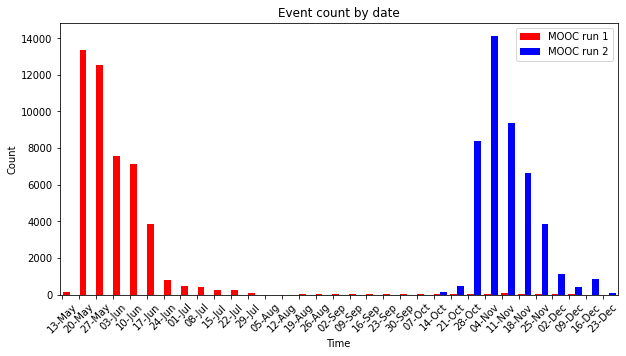

performed_by_guid
2       2014-05-12 13:42:21
2       2014-05-12 13:43:18
2       2014-05-12 13:43:57
2       2014-05-12 13:46:11
2       2014-05-12 13:47:07
                ...        
13598   2014-12-08 14:59:50
13598   2014-12-08 15:00:58
13598   2014-12-08 15:01:20
13598   2014-12-08 15:01:58
13598   2014-12-08 15:02:08
Name: timestamp, Length: 47330, dtype: datetime64[ns]


"\ndf1 = mooc1[(mooc1 > '2014-05-20') & (mooc1 <= '2014-06-21')]\ndf2 = mooc2[(mooc2 > '2014-10-29') & (mooc2 <= '2014-12-20')]\nfig2, ax2 = plt.subplots()\nplt.hist(df1, bins=5, alpha = 0.8, label = 'MOOC 1')\nplt.show()\nplt.hist(df2, bins=8, alpha = 0.8, label = 'MOOC 2')\nplt.show()\n"

In [ ]:
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# we use the original eventlogs without cleaning to show the full distribution
mooc1 = pd.read_csv('mooc1_v1.csv', index_col=0, parse_dates=True, squeeze=True)
mooc2 = pd.read_csv('mooc2_v1.csv')

# take only the timestamps
mooc1 = mooc1['timestamp'].astype('datetime64')
mooc2 = mooc2['timestamp'].astype('datetime64')

# filter the dates where the MOOCs happened
# 33 weeks between these dates
start = '2014-05-12'
finish = '2014-12-29'
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
df1 = mooc1[(mooc1 > start) & (mooc1 <= finish)]
df2 = mooc2[(mooc2 > start) & (mooc2 <= finish)]

fig, ax = plt.subplots(figsize=(10, 5))
#df1.hist(bins=bins, alpha = 0.8, label = 'MOOC 1')
#df2.hist(bins=bins, alpha = 0.8, label = 'MOOC 2')
color=['r', 'b']
plt.hist([df1, df2], label = ['MOOC run 1', 'MOOC run 2'], bins = 33, color=color) #this way each week is a bar
plt.legend(loc='upper right')
plt.title('Event count by date')
ax.set_ylabel("Count")
ax.set_xlabel("Time")
#plt.tight_layout()
#plt.gcf().autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
fmt_month = mdates.WeekdayLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_locator(fmt_month)
_=plt.xticks(rotation=45)
ax.set_xlim(np.datetime64(start, 'D'), np.datetime64(finish, 'D'))
plt.show()
#print(df1)

# Temporal and utils

In [ ]:
# filtering time in datasets

import pandas as pd

mooc1 = pd.read_csv('mooc1_v1.csv')
mooc2 = pd.read_csv('mooc2_v1.csv')

# one day more to include last day
df1 = mooc1[(mooc1['timestamp'] <= '2014-06-21')] #19 may to 20 june
df2 = mooc2[(mooc2['timestamp'] <= '2014-12-20')] #28 oct to 28 nov +3 weeks

df1.to_csv(r'mooc1_v2.csv', index = False, header=True)
df2.to_csv(r'mooc2_v2.csv', index = False, header=True)

df1['mooc'] = 1
df2['mooc'] = 2
final = df1.append(df2)
#print(final)

final.to_csv(r'both_mooc_v2.csv', index = False, header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


       performed_by_guid         event  owner_guid            timestamp  mooc
0                      2         login           0  2013-01-30 07:03:38     1
1                      2         login           0  2013-08-31 00:29:24     1
2                      2        create           2  2013-08-31 00:51:49     1
3                      2  revised_docs           2  2013-08-31 00:51:49     1
4                      2  revised_docs           2  2013-08-31 00:52:38     1
...                  ...           ...         ...                  ...   ...
45389               7376    viewed_lds        7376  2014-12-19 23:39:12     2
45390               7376    viewed_lds        7376  2014-12-19 23:39:25     2
45391               7376    viewed_lds        7376  2014-12-19 23:39:56     2
45392               7376    viewed_lds        7376  2014-12-19 23:40:01     2
45393               7376  revised_docs        7376  2014-12-19 23:46:52     2

[89378 rows x 5 columns]


In [ ]:
# create columns in csv to use in ENA

import pandas as pd

mooc1 = pd.read_csv('mooc1_v3.csv')
mooc1['mooc'] = 'mooc1'
mooc2 = pd.read_csv('mooc2_v3.csv')
mooc2['mooc'] = 'mooc2'

mooc = mooc1.append(mooc2)

event = ['create', 'create from duplicate', 'delete', 'viewed_lds', 'viewed_profile', 
         'revised_docs', 'generic_comment', 'login', 'publish', 'share_add_editor',
         'share_add_viewer', 'share_del_viewer', 'share_add_acv', 'share_remove_acv']

# each column is created and filled with 0s
for a in event:
  mooc[a] = 0

# if the event column in the table matches the name in the created list, set to 1
for a in event:
  mooc.loc[mooc.event == a, a] = 1

mooc.to_csv (r'both_mooc_v3_ENA.csv', index = False, header=True)
#print(len(mooc))

       performed_by_guid         event  ...  share_add_acv share_remove_acv
0                      2         login  ...              0                0
1                      2         login  ...              0                0
2                      2        create  ...              0                0
3                      2  revised_docs  ...              0                0
4                      2  revised_docs  ...              0                0
...                  ...           ...  ...            ...              ...
45389               7376    viewed_lds  ...              0                0
45390               7376    viewed_lds  ...              0                0
45391               7376    viewed_lds  ...              0                0
45392               7376    viewed_lds  ...              0                0
45393               7376  revised_docs  ...              0                0

[89378 rows x 19 columns]


In [ ]:
# append two CSVs

import pandas as pd

mooc1 = pd.read_csv('mooc1_v1_byuser.csv')
mooc2 = pd.read_csv('mooc2_v1_byuser.csv')

final = mooc1.append(mooc2)
final.to_csv (r'both_mooc_v1_byuser.csv', index = False, header=True)